In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import rc
from geolite2 import geolite2
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
pip install maxminddb-geolite2

  Created wheel for maxminddb-geolite2: filename=maxminddb_geolite2-2018.703-py3-none-any.whl size=26407052 sha256=1a71ebf0942dcd7f1150e0f2cb4d9034e0c8f3822f2dc63ebc9200ff75c430ff
  Stored in directory: c:\users\pereira\appdata\local\pip\cache\wheels\9c\9d\d1\3e8864c72406de431f3298f506d867fe700cd10e448c016fa6
  Created wheel for maxminddb: filename=maxminddb-2.2.0-py2.py3-none-any.whl size=16357 sha256=f7641369cc3f864483add2ac24abb96ed305893600818f7acc17ee6722c11585
  Stored in directory: c:\users\pereira\appdata\local\pip\cache\wheels\23\dc\fa\8784124400b0b6dd34e2e465759197396e5b2a22d0e10e0b0a
Successfully built maxminddb-geolite2 maxminddb
Note: you may need to restart the kernel to use updated packages.


#**S04 T01: Transformació Registre Log amb Regular expressions**#

##*Exercice 1*##

*Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".*

In [4]:
pattern = r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])'

logs = pd.read_csv(r"C:\Users\Pereira\Documents\IT Academy\Repos GitHub\Data-sources\Web_access_log-akumenius.com.txt\Web_access_log-akumenius.com.txt", 
    sep=pattern,
    engine = 'python',
    na_values = '-',
    header = None,
    usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    names = ['host','host_IP', 'user_identity', 'user_id','request_date', 'request_line', 'status', 'size', 'linked_from','user_browser'],
    converters= {'size': int, 'status': int})

In [5]:
logs

,host,host_IP,user_identity,user_id,request_date,request_line,status,size,linked_from,user_browser
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""


In [6]:
# new data frame with split value columns
#new = logs["request_line"].str.split("(\*|\/+)(?![HTTP\/1])", n = 1, expand = True)

logs[["http_method", "delete", "request"]] = logs["request_line"].str.split(" ", expand = True)

logs

,host,host_IP,user_identity,user_id,request_date,request_line,status,size,linked_from,user_browser,http_method,delete,request
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""GET",/,"HTTP/1.1"""
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""HEAD",/,"HTTP/1.1"""
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*,"HTTP/1.0"""


In [7]:
del logs['request']
logs

,host,host_IP,user_identity,user_id,request_date,request_line,status,size,linked_from,user_browser,http_method,delete
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""GET",/
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""HEAD",/
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS",*


In [8]:
del logs['delete']
logs

,host,host_IP,user_identity,user_id,request_date,request_line,status,size,linked_from,user_browser,http_method
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""GET"
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""HEAD"
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)""","""OPTIONS"


Els logs o fitxers de registre són una eina estàndard per als desenvolupadors i administradors de sistemes informàtics. Enregistren el **"què va passar, quan, per qui"** del sistema. Aquesta informació pot registrar errors i ajudar-los al diagnòstic, així com identificar infraccions de seguretat i altres ús indeguts de l'ordinador.

La informació emmagatzemada només està disponible per a un anàlisi posterior si s'emmagatzema en un format analitzable. Aquestes dades es poden estructurar de moltes maneres per analitzar-les. Un format de text senzill minimitza les dependències d'altres processos del sistema i ajuda el registre en totes les fases del funcionament de l'ordinador, inclòs l'inici i l'aturada, quan aquests processos poden no estar disponibles.

En aquest cas, ens trobem amb un format de log **"common log"**. És un format de fitxer de text estandarditzat utilitzat pels servidors web quan generen fitxers de log. Com que el format està estandarditzat, els fitxers es poden analitzar fàcilment mitjançant una varietat de programes d'anàlisi web.

Per exemple,
**127.0.0.1 user-identifier frank [10/Oct/2000:13:55:36 -0700] "GET /apache_pb.gif HTTP/1.0" 200 2326**
Un guió (-) en un camp indica que falten dades.

***127.0.0.1*** és l'adreça IP del client (remote host) que ha fet la petició al servidor. 


***user-identifier*** és la RFC 1413 identitat del client. Normalment sol ser "-".


***frank*** és el userid de la persona demanant el document. Normalment "-" si .htaccess no ha demanat autenticació. 


***[10/Oct/2000:13:55:36 -0700]*** és la data, hora i zona horàri que la petició ha rebut, en format de temps per defecte "dia/mes/any:hora:minuts:segons -nom zona horària".


***"GET /apache_pb.gif HTTP/1.0"*** és la petició del client. TEl mètode és GET, /apache_pb.gif el recurs demanat, i HTTP/1.0 el protocol HTTP.


***200*** és el codi de l'status HTTP status retornat al client. 2xx és una resposta exitosa, 3xx una redirecció, 4xx un error de client i 5xx un error de servidor.


***2326*** és el tamany de l'objecte retornar al client, mesurat en bytes.

In [27]:
logs['status'].unique()

array([200, 404, 304, 502, 301, 403, 408, 400, 206, 401, 302, 500],
      dtype=int64)

In [29]:
logs['http_method'].unique()

array(['"OPTIONS', '"GET', '"HEAD', '"POST', '"-"',
       '"\\x80w\\x01\\x03\\x01"'], dtype=object)

***Llista dels status***

200 -- OK


206 -- Partial Content


301 -- Moved Permanently


302 -- Found


304 -- Not Modified


400 -- Bad Request


401 -- Unauthorized


403 -- Forbidden


404 -- Not Found


408 -- Request Time-out


500 -- Internal Server Error


502 -- Bad Gateway


***Mètodes de sol·licitud HTTP***

HTTP defineix un conjunt de mètodes de sol·licitud per indicar l'acció desitjada a realitzar per a un recurs determinat. Tot i que també poden ser substantius, aquests mètodes de sol·licitud de vegades es coneixen com a verbs HTTP. Cadascun d'ells implementa una semàntica diferent, però alguns trets comuns són compartits per un grup d'ells: per exemple, un mètode de sol·licitud pot ser segur, idempotent o cacheable.

**GET**
El mètode GET sol·licita una representació del recurs especificat. Les sol·licituds que utilitzen GET només haurien de recuperar dades.

**HEAD**
El mètode HEAD demana una resposta idèntica a una sol·licitud GET, però sense el cos de la resposta.

**POST**
El mètode POST envia una entitat al recurs especificat, sovint provocant un canvi d'estat o efectes secundaris al servidor.

**OPTIONS**
El mètode OPCIONS descriu les opcions de comunicació per al recurs de destinació.

Hi ha més mètodes que no apareixen en el nostre dataframe:

**PUT**
El mètode PUT substitueix totes les representacions actuals del recurs objectiu amb la càrrega útil de la sol·licitud.

**DELETE**
El mètode DELETE elimina el recurs especificat.

**CONNECT**
El mètode CONNECT estableix un túnel al servidor identificat pel recurs de destinació.

**TRACE**
El mètode TRACE realitza una prova de retorn de missatges al llarg del camí cap al recurs objectiu.

**PATCH**
El mètode PATCH aplica modificacions parcials a un recurs.

In [9]:
logs = logs[['host','host_IP', 'user_identity', 'user_id','request_date', 'request_line', 'http_method', 'status', 'size', 'linked_from','user_browser']]

In [10]:
logs

,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,user_browser
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""","""GET",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""","""HEAD",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)"""


In [11]:
logs[["browser", "broswer_type", "delete", "delete2"]] = logs["user_browser"].str.split("(", expand = True)
logs

C:\Users\Pereira\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,user_browser,browser,broswer_type,delete,delete2
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""","""GET",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""Mozilla/5.0",compatible; YandexBot/3.0; +http://yandex.com/...,None,None
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""","""HEAD",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""Mozilla/5.0+",compatible; UptimeRobot/2.0; http://www.uptime...,None,None
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None,None


In [12]:
del logs['delete']
logs

,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,user_browser,browser,broswer_type,delete2
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""","""GET",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""Mozilla/5.0",compatible; YandexBot/3.0; +http://yandex.com/...,None
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""","""HEAD",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""Mozilla/5.0+",compatible; UptimeRobot/2.0; http://www.uptime...,None
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)""",None


In [13]:
del logs['delete2']
logs

,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,user_browser,browser,broswer_type
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""","""GET",200,7528,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http...","""Mozilla/5.0",compatible; YandexBot/3.0; +http://yandex.com/...
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""","""HEAD",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt...","""Mozilla/5.0+",compatible; UptimeRobot/2.0; http://www.uptime...
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache (internal dummy connection)""","""Apache","internal dummy connection)"""


In [14]:
del logs['user_browser']
logs

,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,browser,broswer_type
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,NaN,NaN,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""","""GET",200,7528,"""-""","""Mozilla/5.0",compatible; YandexBot/3.0; +http://yandex.com/...
261869,www.akumenius.com,74.86.158.107,NaN,NaN,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""","""HEAD",200,NaN,"""-""","""Mozilla/5.0+",compatible; UptimeRobot/2.0; http://www.uptime...
261870,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""
261871,localhost,127.0.0.1,NaN,NaN,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""","""Apache","internal dummy connection)"""


##*Exercice 3*##

*Geolocalitza les IP's.*

In [35]:
pip install ipinfo

Note: you may need to restart the kernel to use updated packages.


In [38]:
import ipinfo
access_token = '10b0645a69567a'
handler = ipinfo.getHandler(access_token)

In [43]:
logs['host_IP'].describe()

count            261873
unique             2921
top       66.249.76.216
freq              46382
Name: host_IP, dtype: object

In [46]:
#fem un nou dataframe amb les IPs úniques
logs2 = logs.groupby('host_IP')
logs3 = pd.DataFrame(logs2)
logs3 = logs3.rename(columns={0: 'IP', 1: 'Host'})
logs3

,IP,Host
0,101.199.108.59,host host_IP use...
1,101.226.167.226,host host_IP us...
2,107.178.37.48,host host_IP user...
3,107.178.38.221,host host_IP use...
4,107.21.14.116,host host_IP user...
...,...,...
2916,95.63.234.126,host host_IP user...
2917,95.63.60.249,host host_IP user_...
2918,96.242.31.129,host host_IP user...
2919,98.137.206.41,host host_IP user...


In [ ]:
# Guardem la info de les IPS en un nou df
logs_IP = pd.DataFrame() 
for index, IP in enumerate(logs3.IP):
    details = handler.getDetails(IP)
    logs_IP = logs_IP.append(details.all, ignore_index=True)

In [48]:
logs_IP

,ip,city,region,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon
0,101.199.108.59,Beijing,Beijing,CN,"39.9075,116.3972",Asia/Shanghai,China,39.9075,116.3972,NaN,NaN,NaN,NaN
1,101.226.167.226,Shanghai,Shanghai,CN,"31.2222,121.4581",Asia/Shanghai,China,31.2222,121.4581,AS4812 China Telecom (Group),NaN,NaN,NaN
2,107.178.37.48,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-37-48.ip.cloudmosa.com,95103,NaN
3,107.178.38.221,San Jose,California,US,"37.3394,-121.8950",America/Los_Angeles,United States,37.3394,-121.8950,AS174 Cogent Communications,107-178-38-221.ip.cloudmosa.com,95103,NaN
4,107.21.14.116,Ashburn,Virginia,US,"39.0437,-77.4875",America/New_York,United States,39.0437,-77.4875,"AS14618 Amazon.com, Inc.",ec2-107-21-14-116.compute-1.amazonaws.com,20147,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,188.85.194.73,Málaga,Andalusia,ES,"36.7202,-4.4203",Europe/Madrid,Spain,36.7202,-4.4203,AS12430 VODAFONE ESPANA S.A.U.,static-73-194-85-188.ipcom.comunitel.net,29009,NaN
732,188.85.195.156,Málaga,Andalusia,ES,"36.7202,-4.4203",Europe/Madrid,Spain,36.7202,-4.4203,AS12430 VODAFONE ESPANA S.A.U.,static-156-195-85-188.ipcom.comunitel.net,29001,NaN
733,188.85.232.152,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS12430 VODAFONE ESPANA S.A.U.,static-152-232-85-188.ipcom.comunitel.net,28001,NaN
734,188.85.24.226,Madrid,Madrid,ES,"40.4165,-3.7026",Europe/Madrid,Spain,40.4165,-3.7026,AS12430 VODAFONE ESPANA S.A.U.,static-226-24-85-188.ipcom.comunitel.net,28001,NaN


##*Exercice 4*##

*Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.*

In [65]:
logs_total = logs.copy()

In [71]:
#combinem el dataframe principal i el nou amb la info de les IPs
logs_total = pd.merge(logs_total, logs_IP,left_on="host_IP", right_on="ip")

In [73]:
logs_total

,host,host_IP,user_identity,user_id,request_date,request_line,http_method,status,size,linked_from,...,country,loc,timezone,country_name,latitude,longitude,org,hostname,postal,bogon
0,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""",...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,1.0
1,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""",...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,1.0
2,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""",...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,1.0
3,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""",...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,1.0
4,localhost,127.0.0.1,NaN,NaN,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""","""OPTIONS",200,NaN,"""-""",...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41965,www.akumenius.com,187.133.87.116,NaN,NaN,[02/Mar/2014:00:41:09 +0100],"""GET /libraries/jqueryui/css/ui-lightness/imag...","""GET",200,90,"""http://www.akumenius.com/hoteles-baratos/hote...",...,MX,"22.7684,-102.5814",America/Mexico_City,Mexico,22.7684,-102.5814,AS8151 Uninet S.A. de C.V.,dsl-187-133-87-116-dyn.prod-infinitum.com.mx,98054,NaN
41966,www.akumenius.com,187.133.87.116,NaN,NaN,[02/Mar/2014:00:41:10 +0100],"""GET /icon.png HTTP/1.1""","""GET",200,1089,"""http://www.akumenius.com/hoteles-baratos/hote...",...,MX,"22.7684,-102.5814",America/Mexico_City,Mexico,22.7684,-102.5814,AS8151 Uninet S.A. de C.V.,dsl-187-133-87-116-dyn.prod-infinitum.com.mx,98054,NaN
41967,www.akumenius.com,157.55.34.176,NaN,NaN,[02/Mar/2014:01:14:22 +0100],"""GET /escapadas/escapada-gaudi-hotel-sol-costa...","""GET",200,3100,"""-""",...,US,"47.6740,-122.1215",America/Los_Angeles,United States,47.6740,-122.1215,AS8075 Microsoft Corporation,NaN,98052,NaN
41968,www.akumenius.com,188.135.173.80,NaN,NaN,[02/Mar/2014:02:44:08 +0100],"""GET /destinos-baratos/hoteles-en-Alvor_PORTUG...","""GET",200,21144,"""http://www.akumenius.com/""",...,IT,"44.4048,8.9444",Europe/Rome,Italy,44.4048,8.9444,NaN,NaN,16100,NaN


In [54]:
logs_IP.country_name.describe()

count               735
unique               37
top       United States
freq                261
Name: country_name, dtype: object

Hi ha IPS de 37 països diferents, i EEUU és el que apareix més.

In [79]:
#analitzem les visites per país
top10_users = logs_IP.country_name.value_counts().head(10)
top10_users

United States    261
China            145
Japan            112
Spain             52
Germany           30
Brazil            22
France            16
Mexico            11
Singapore          8
Colombia           7
Name: country_name, dtype: int64

Hi ha 261 usuaris únics a EEUU.

In [80]:
top10_country = logs_total.country_name.value_counts().head(10)
top10_country

United States    9525
Spain            5790
Japan            3798
China            3033
Germany          1354
France           1127
Brazil            596
Mexico            506
Colombia          337
Argentina         283
Name: country_name, dtype: int64

Els usuaris d'EEUU accedeixen 9525 vegades al web.

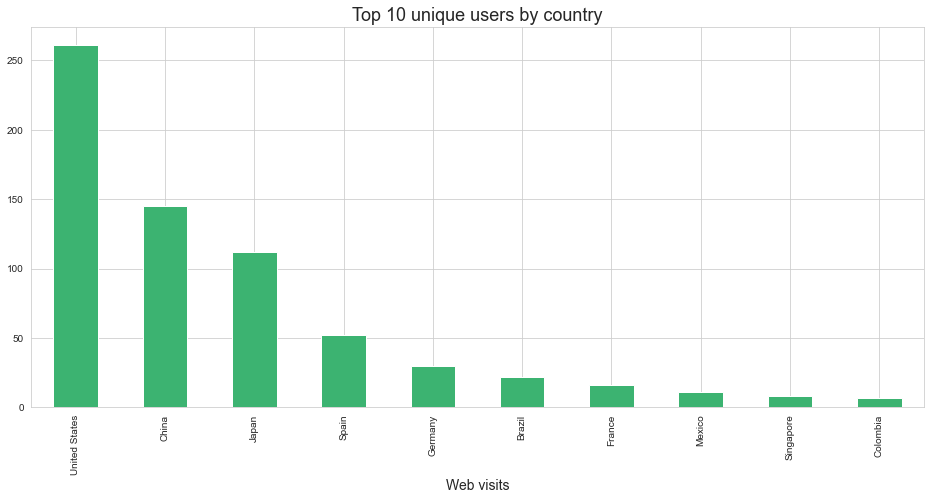

In [76]:
plt.figure(figsize=(16,7))
sns.set_style("whitegrid")

logs_IP['country_name'].value_counts()[:10].plot(kind='bar', color="mediumseagreen")
plt.title('Top 10 unique users by country', size=18)
plt.xlabel('Web visits', size=14);

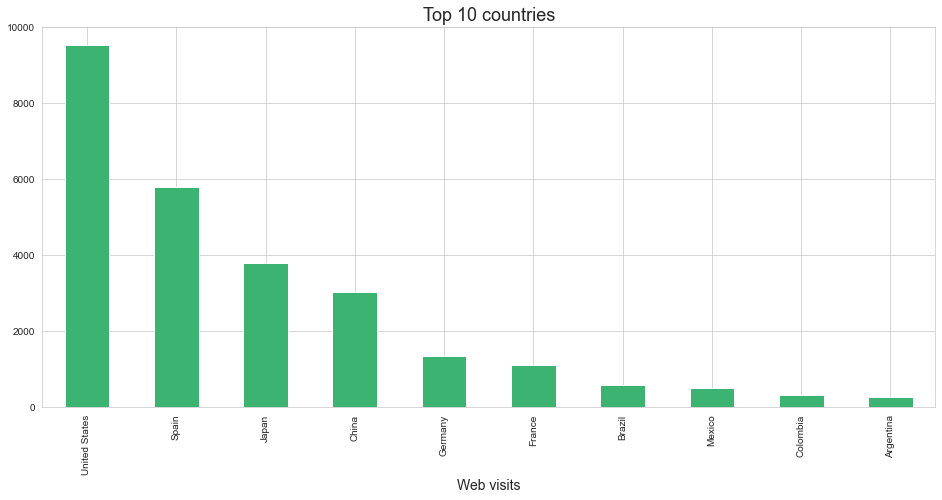

In [78]:
plt.figure(figsize=(16,7))
logs_total['country_name'].value_counts()[:10].plot(kind='bar', color="mediumseagreen")
plt.title('Top 10 countries', size=18)
plt.xlabel('Web visits', size=14);

A les gràfiques veiem que 261 usuaris unics de EEUU accedeixen al web 9525 cops.

In [60]:
#analitzem les visites per ciutat
logs_IP.city.value_counts()

Tokyo           112
Quincy           82
Foshan           72
San Jose         50
Beijing          48
               ... 
Goiânia           1
Mariana           1
Boydton           1
Selb              1
Taoyuan City      1
Name: city, Length: 166, dtype: int64

In [81]:
logs_total.city.value_counts()

Tokyo                3798
New York City        2927
Quincy               2845
Foshan               2561
Madrid               1709
                     ... 
Mazatlán                1
Ham                     1
Berlin                  1
Gasteiz / Vitoria       1
Melbourne               1
Name: city, Length: 166, dtype: int64

Tokio és la ciutat amb més usuaris únics (112) i també els que visiten el web més sovint (3798 vegades).

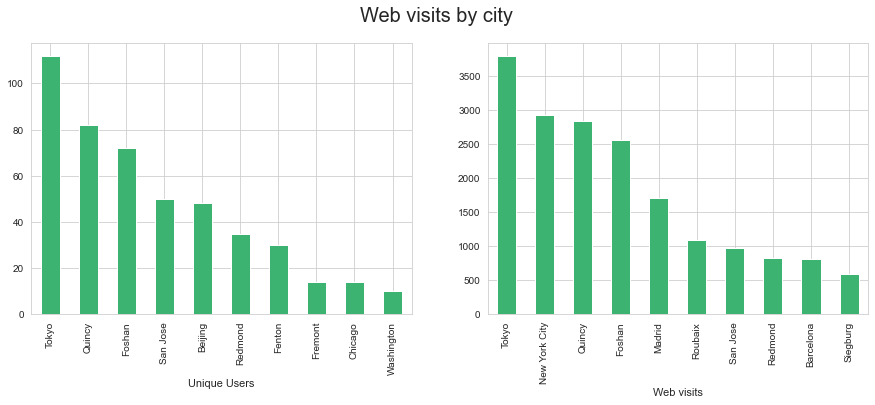

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Web visits by city', size=20)
logs_IP['city'].value_counts()[:10].plot(kind='bar', ax=ax1, color="mediumseagreen")
logs_total['city'].value_counts()[:10].plot(kind='bar', ax=ax2, color="mediumseagreen")
ax1.set_xlabel('Unique Users', size=11);
ax2.set_xlabel('Web visits', size=11);

In [90]:
#analitzem per zona horària
logs_IP.timezone.value_counts()

America/Los_Angeles               185
Asia/Shanghai                     145
Asia/Tokyo                        112
Europe/Madrid                      52
America/Chicago                    51
Europe/Berlin                      30
America/New_York                   20
America/Sao_Paulo                  16
Europe/Paris                       16
Asia/Singapore                      8
America/Bogota                      7
Europe/Kiev                         6
America/Mexico_City                 6
America/Detroit                     5
Europe/Moscow                       5
Europe/Rome                         4
America/Santiago                    4
America/Argentina/Buenos_Aires      4
America/Montevideo                  4
Asia/Taipei                         4
America/Panama                      3
America/Santo_Domingo               3
America/Fortaleza                   3
Europe/Dublin                       3
America/Guayaquil                   3
America/La_Paz                      2
America/Cara

In [94]:
logs_total.timezone.value_counts()

Europe/Madrid                     5790
America/Los_Angeles               5097
Asia/Tokyo                        3798
America/New_York                  3467
Asia/Shanghai                     3033
Europe/Berlin                     1354
Europe/Paris                      1127
America/Chicago                    925
America/Sao_Paulo                  508
America/Bogota                     337
America/Montevideo                 242
America/Argentina/Buenos_Aires     236
America/Monterrey                  182
America/Mexico_City                181
Europe/Andorra                     171
America/Santo_Domingo              137
America/Managua                    131
America/Guayaquil                  120
Europe/London                       92
America/Santiago                    87
America/Bahia                       81
Europe/Lisbon                       81
Australia/Brisbane                  78
America/Panama                      77
America/Caracas                     74
Europe/Zurich            

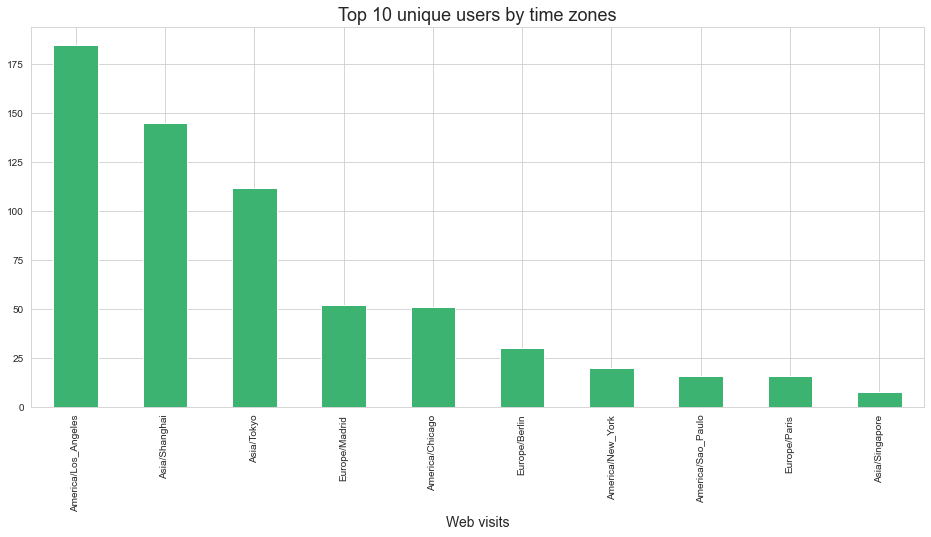

In [96]:
plt.figure(figsize=(16,7))
logs_IP['timezone'].value_counts()[:10].plot(kind='bar', color="mediumseagreen")
plt.title('Top 10 unique users by time zones', size=18)
plt.xlabel('Web visits', size=14);

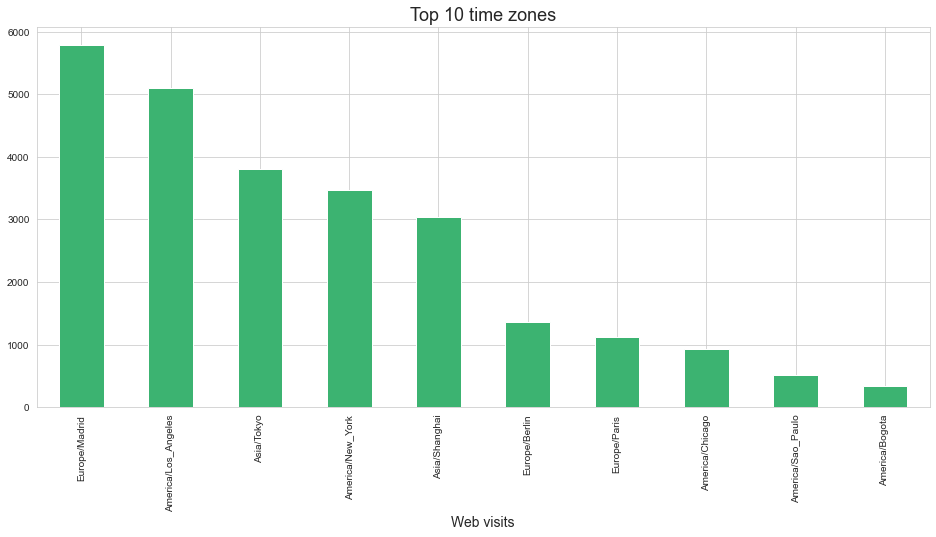

In [95]:
plt.figure(figsize=(16,7))
logs_total['timezone'].value_counts()[:10].plot(kind='bar', color="mediumseagreen")
plt.title('Top 10 time zones', size=18)
plt.xlabel('Web visits', size=14);

En aquestes gràfiques veiem que, tot i que la zona horària dels usuaris únics és America/LA en la seva majoria, si analitzem en total de visites, és Europe/Madrid.